# Refinitiv Inter-University Hackathon: Group 9, The University of Edinburgh
# Predicting M&A prior to announcment

Authors: 	Haykaz Aramyan, Evana Kuruvilla

### Current Jupiter notebook includes:
1. Classification Model to predict whether the specified company is Target or Aquirer
2. Clustering Model to cluster target company into specified clusters
3. Classification algorithm to predict whether the company is target or non-target and assign probability

# Section 1: Tartget versus Aquirer classification

- Import required packages for all models
- Constract dataset containing data from Target and Aquirer companies
- Evaluation of Logistic regression algorithm
- Evaluation of Decision tree and Random forest Algorithms

In [546]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline

### Constraction of Dataset

In [547]:
#The original data has been retrieved from Refinitiv's platform using excel and get_data API, then stored in an Excel file 
data = pd.read_excel (r'C:\Users\aramy\OneDrive - University of Edinburgh\Hackathon\Target_Aquirer_ML.xlsx')
data = data.iloc[:,7:31]
data.head()

,Announcement Date,Announcement Date-1,Announcement Date-30,Market Cap,Total_return_1m,Return%,Net Debt/Net Book Value,Net debt/Total Capital,Debt/EV,Net debt per share,...,Net income after tax,Profit Before tax/Sales,Profit/Shareholder equity,P/E,Price/Sales,Market Cap/Shar equity,Sales/Total Assets,Long term debt/Total assets,Working ca/Total assets,Label
0,2020-11-16,2020-11-15,2020-10-17,7.267451e+09,6.235183,0.062604,59.80975,0.59211,23.611908,17.152600,...,451000000,0.101855,0.463018,29.100804,1.990156,5.375334,1.303499,43.16013,0.18006,1
1,2020-03-02,2020-03-01,2020-02-01,1.713202e+09,-5.879926,-0.065884,50.80430,0.50566,34.503656,19.679131,...,83734000,0.188055,0.136929,20.716221,2.796494,2.036225,0.289400,41.42546,0.03228,1
2,2020-01-09,2020-01-08,2019-12-10,1.253410e+09,1.825407,0.025256,48.95008,0.47598,16.065017,9.911070,...,117221000,0.116925,0.381462,14.668999,0.935858,3.231796,0.993806,29.72611,-0.12040,1
3,2020-01-06,2020-01-05,2019-12-07,2.744418e+08,-2.050326,-0.046279,-2.18758,-0.01874,6.939395,-0.123266,...,3640000,0.014087,0.037768,62.104828,0.615185,1.829685,1.286434,6.33513,-0.00422,1
4,2019-12-24,2019-12-23,2019-11-24,2.962986e+09,1.518312,0.015183,42.71122,0.41485,41.875058,34.574912,...,153500000,0.028702,0.153528,14.818938,0.340088,1.886772,1.805291,26.77140,0.33030,1


In [548]:
data.corr(method ='pearson').to_excel('correl.xlsx')

In [549]:
data.drop(['Market Cap', 'Total_return_1m', 'Quick Ratio', 'Net Debt/Net Book Value', 'Net debt/Total Capital', 'Normalized pre-tax profit', 'Net income after tax', 'Long term debt/Total assets', 'Working ca/Total assets', 'P/E'],
          axis = 1, inplace= True)
data.describe()

,Return%,Debt/EV,Net debt per share,Current Ratio,Gross Profit Margin,Profit Before tax/Sales,Profit/Shareholder equity,Price/Sales,Market Cap/Shar equity,Sales/Total Assets,Label
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,4.920000e+02,492.000000,492.000000,492.000000
mean,0.019958,24.444656,12.281192,2.266890,38.879264,0.123529,0.237129,2.018396e+00,3.682266,0.959195,0.341463
std,0.099715,19.845617,21.352612,1.871522,18.863532,0.115109,0.939315,1.794133e+00,11.348279,0.747844,0.474683
min,-0.329149,0.000000,-32.829288,0.166900,-11.356920,-0.640670,-10.643744,4.200000e-08,-99.299019,0.060173,0.000000
25%,-0.035438,9.628942,0.629944,1.149215,23.117622,0.052563,0.107262,7.644776e-01,1.746670,0.518201,0.000000
50%,0.016319,20.506660,6.501728,1.824925,37.026935,0.106262,0.184572,1.462343e+00,2.583649,0.774858,0.000000
75%,0.062526,34.539926,17.515840,2.743467,51.246510,0.174006,0.307664,2.687414e+00,4.359888,1.173669,1.000000
max,0.635783,134.172406,213.963941,21.951820,92.612260,0.668708,10.662045,1.392101e+01,113.441745,5.553042,1.000000


In [550]:
X = data.drop(['Label', 'Announcement Date', 'Announcement Date-1', 'Announcement Date-30'], axis = 1)
y = data['Label'].values

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

### Evaluation of Logistic Regression

In [552]:
lr = LogisticRegression(solver = 'liblinear',penalty = 'l2', random_state=0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Classification accuracy on training set: {:.3f}'.format(lr.score(X_train, y_train)))
print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_test, y_test)))

Classification accuracy on training set: 0.669
Classification accuracy on test set: 0.667


In [553]:
labels = ['target', 'Aquirer']

print(classification_report(y_test, y_pred_lr, target_names = labels))

              precision    recall  f1-score   support

      target       0.70      0.91      0.79        69
     Aquirer       0.33      0.10      0.15        30

    accuracy                           0.67        99
   macro avg       0.52      0.51      0.47        99
weighted avg       0.59      0.67      0.60        99



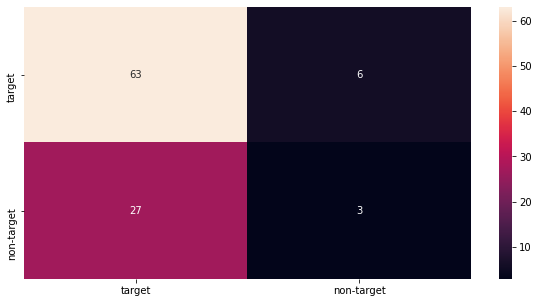

In [554]:
cm = confusion_matrix(y_test, y_pred_lr)
labels = ['target', 'non-target']
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, xticklabels = labels, yticklabels = labels, fmt='g')
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.673


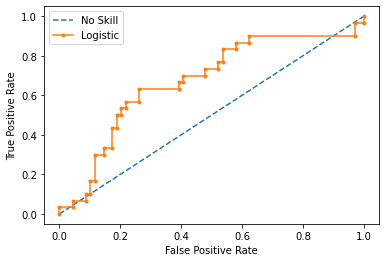

In [555]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [556]:
coeff_parameter = pd.DataFrame(lr.coef_.T,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Return%,1.111354
Debt/EV,0.012296
Net debt per share,-0.010715
Current Ratio,0.022711
Gross Profit Margin,0.012157
Profit Before tax/Sales,-0.963877
Profit/Shareholder equity,-0.841560
Price/Sales,-0.109891
Market Cap/Shar equity,0.045988
Sales/Total Assets,0.288661


### Evaluation of Decicion tree and Random Forest algorithms

In [557]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1000)
dt.fit(X_train.astype(float), y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1000)

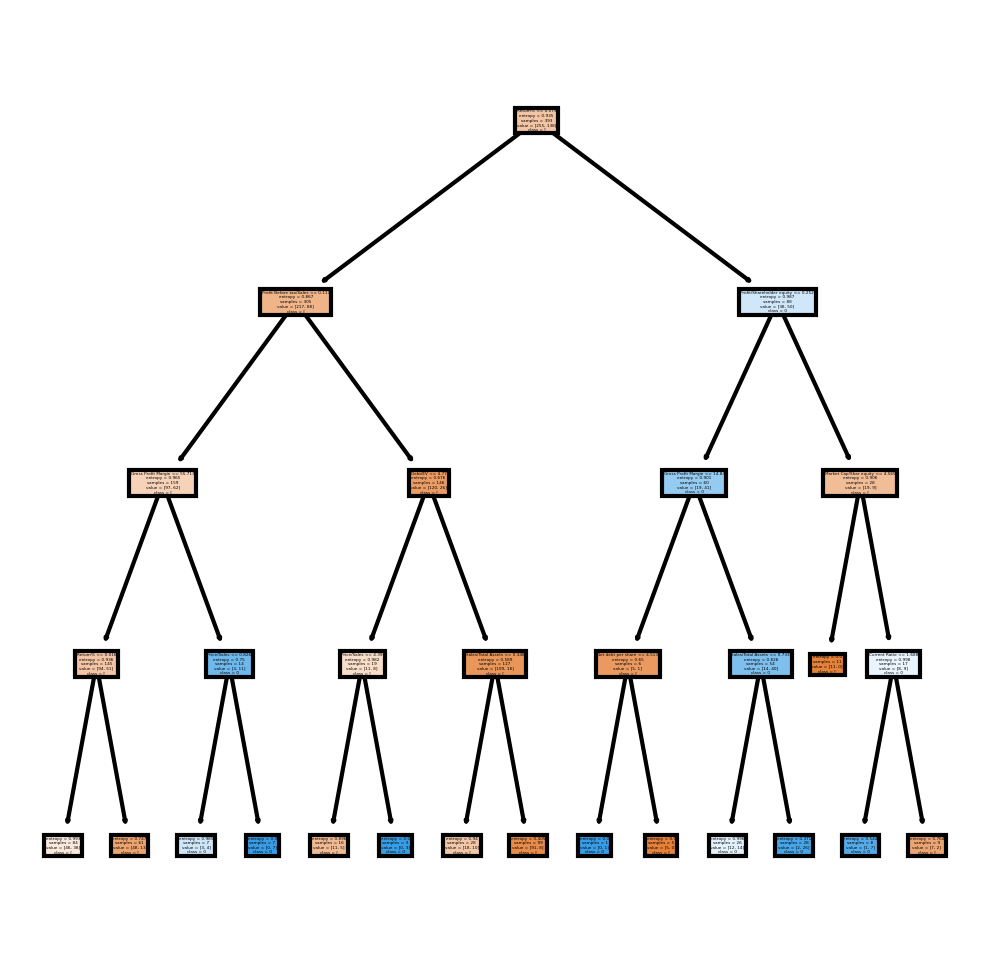

In [558]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X.columns, 
               class_names=str(np.unique(y_train)),
               filled = True)
fig.savefig('dt.png')

In [559]:
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train,y_pred_dt_train)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_pred_dt_test)))

Classification accuracy on training set: 0.761
Classification accuracy on test set: 0.677


In [560]:
labels = ['target', 'Aquirer']

print(classification_report(y_test, y_pred_dt_test, target_names = labels))

              precision    recall  f1-score   support

      target       0.72      0.88      0.79        69
     Aquirer       0.43      0.20      0.27        30

    accuracy                           0.68        99
   macro avg       0.57      0.54      0.53        99
weighted avg       0.63      0.68      0.63        99



In [561]:
rf = RandomForestClassifier(n_estimators=500, 
                            criterion='entropy', 
                            max_features=1, 
                            max_depth=5, 
                            n_jobs=2)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=1,
                       n_estimators=500, n_jobs=2)

In [562]:
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_pred_rf_test)))

Classification accuracy on test set: 0.677


In [563]:
labels = ['target', 'Aquirer']

print(classification_report(y_test, y_pred_rf_test, target_names = labels))

              precision    recall  f1-score   support

      target       0.69      0.96      0.80        69
     Aquirer       0.25      0.03      0.06        30

    accuracy                           0.68        99
   macro avg       0.47      0.49      0.43        99
weighted avg       0.56      0.68      0.58        99



In [254]:
for i, column in enumerate(X.columns):
    if rf.feature_importances_[i] > 0:
        print('Importance of feature {}:, {:.3f}'.format(column, rf.feature_importances_[i]))

Importance of feature Return%:, 0.115
Importance of feature Debt/EV:, 0.116
Importance of feature Net debt per share:, 0.096
Importance of feature Current Ratio:, 0.089
Importance of feature Gross Profit Margin:, 0.088
Importance of feature Profit Before tax/Sales:, 0.118
Importance of feature Profit/Shareholder equity:, 0.107
Importance of feature Price/Sales:, 0.094
Importance of feature Market Cap/Shar equity:, 0.081
Importance of feature Sales/Total Assets:, 0.098


# Section 2: Target versus non-target classification

- Constraction of dataset containing datapoints from target companies and their peers
- Evaluation of logistic regression and decision tree models before clustering
- Kmeans clustering of datapoints
- Evaluation of logistic regression on each cluster
- Evaluation of decision tree and random forest models on each cluster

In [500]:
target = pd.read_excel (r'C:\Users\aramy\OneDrive - University of Edinburgh\Hackathon\ML_target.xlsx')
target = target.iloc[:,7:31]
target.head()

,Announcement Date,Announcement Date-1,Announcement Date-30,Market Cap,Total_return_1m,Return%,Net Debt/Net Book Value,Net debt/Total Capital,Debt/EV,Net debt per share,...,Net income after tax,Profit Before tax/Sales,Profit/Shareholder equity,Price/Sales,P/E,Market Cap/Shar equity,Sales/Total Assets,Long term debt/Total assets,Working ca/Total assets,Label
0,2020-11-16,2020-11-15,2020-10-17,7.267451e+09,6.235183,0.062604,59.80975,0.59211,23.611908,17.152600,...,451000000.0,0.101855,0.463018,1.990156,29.100804,5.375334,1.303499,43.16013,0.18006,1
1,2020-03-02,2020-03-01,2020-02-01,1.713202e+09,-5.879926,-0.065884,50.80430,0.50566,34.503656,19.679131,...,83734000.0,0.188055,0.136929,2.796494,20.716221,2.036225,0.289400,41.42546,0.03228,1
2,2020-01-09,2020-01-08,2019-12-10,1.253410e+09,1.825407,0.025256,48.95008,0.47598,16.065017,9.911070,...,117221000.0,0.116925,0.381462,0.935858,14.668999,3.231796,0.993806,29.72611,-0.12040,1
3,2020-01-06,2020-01-05,2019-12-07,2.744418e+08,-2.050326,-0.046279,-2.18758,-0.01874,6.939395,-0.123266,...,3640000.0,0.014087,0.037768,0.615185,62.104828,1.829685,1.286434,6.33513,-0.00422,1
4,2019-12-24,2019-12-23,2019-11-24,2.962986e+09,1.518312,0.015183,42.71122,0.41485,41.875058,34.574912,...,153500000.0,0.028702,0.153528,0.340088,14.818938,1.886772,1.805291,26.77140,0.33030,1


In [501]:
target.corr(method ='pearson').to_excel('correl.xlsx')

In [502]:
target.drop(['Market Cap', 'Total_return_1m', 'Quick Ratio', 'Net Debt/Net Book Value', 'Normalized pre-tax profit', 'Net income after tax', 'Long term debt/Total assets', 'Working ca/Total assets', 'P/E'], axis = 1, inplace= True)
target.describe()

,Return%,Net debt/Total Capital,Debt/EV,Net debt per share,Current Ratio,Gross Profit Margin,Profit Before tax/Sales,Profit/Shareholder equity,Price/Sales,Market Cap/Shar equity,Sales/Total Assets,Label
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,3.350000e+02,335.000000,335.000000,335.000000
mean,0.025533,0.267808,25.113317,11.131033,2.370409,36.832546,0.096309,0.129034,1.889673e+00,3.581415,1.044271,0.501493
std,0.112685,0.441027,20.956075,20.136209,2.065763,18.041900,0.172405,0.868781,1.830520e+00,8.402389,0.786501,0.500746
min,-0.419355,-1.024990,0.000000,-27.693238,0.181390,4.142830,-1.299398,-10.643744,4.200000e-08,-36.585295,0.060173,0.000000
25%,-0.037158,-0.003895,7.956832,-0.123661,1.215460,22.456695,0.037312,0.070330,7.333445e-01,1.506252,0.527698,0.000000
50%,0.019295,0.310250,22.000398,5.766550,1.939940,34.369990,0.080072,0.148963,1.376771e+00,2.496207,0.845694,1.000000
75%,0.084435,0.521200,37.182328,15.271053,2.917090,47.904945,0.148182,0.261813,2.437040e+00,3.969418,1.279279,1.000000
max,0.635783,2.450480,134.172406,187.817663,24.845980,96.281620,1.709808,6.441441,1.476480e+01,92.671086,4.769508,1.000000


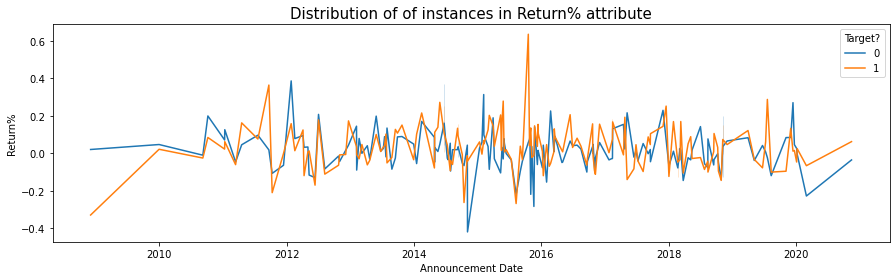

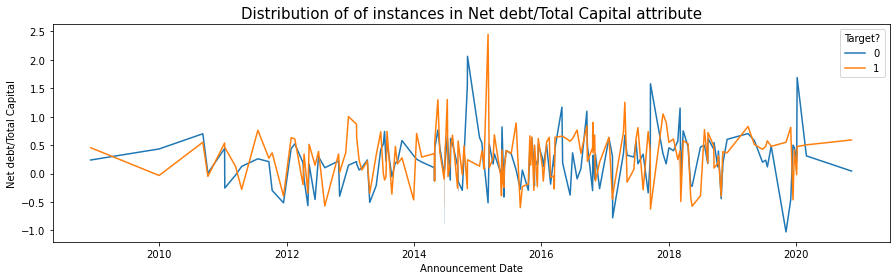

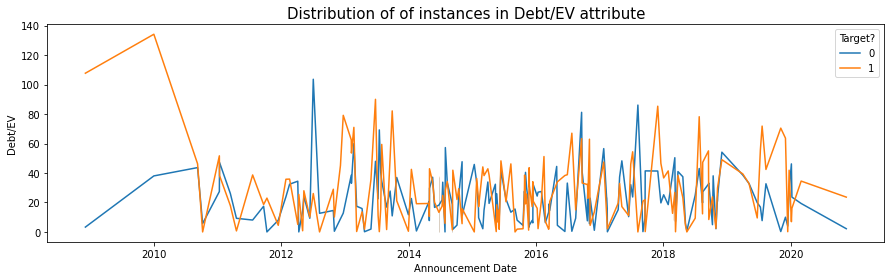

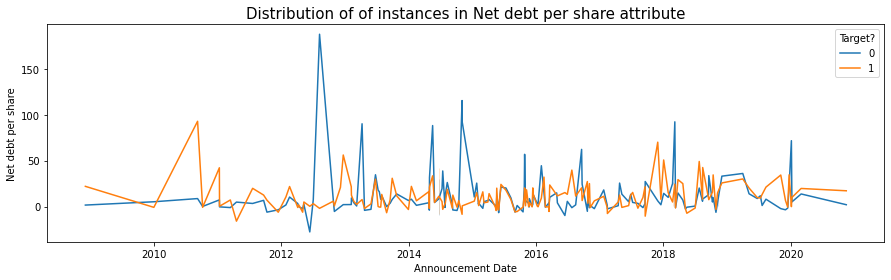

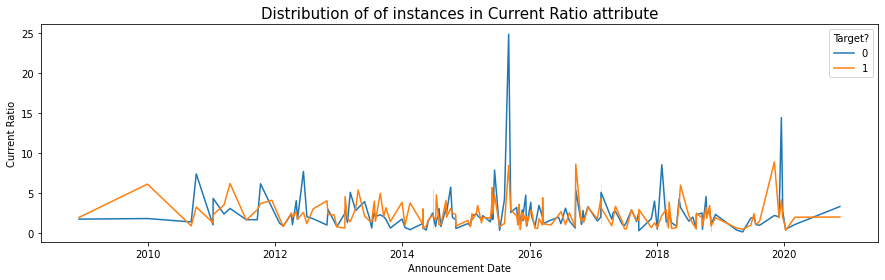

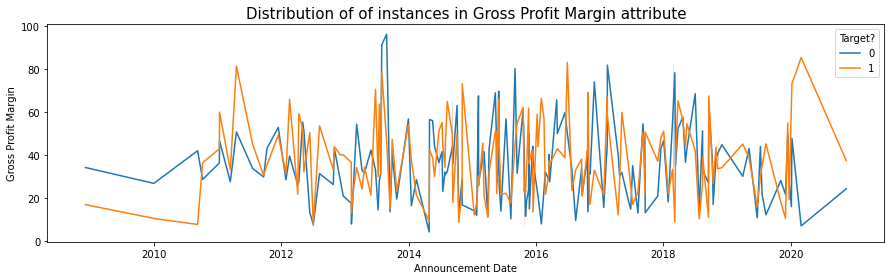

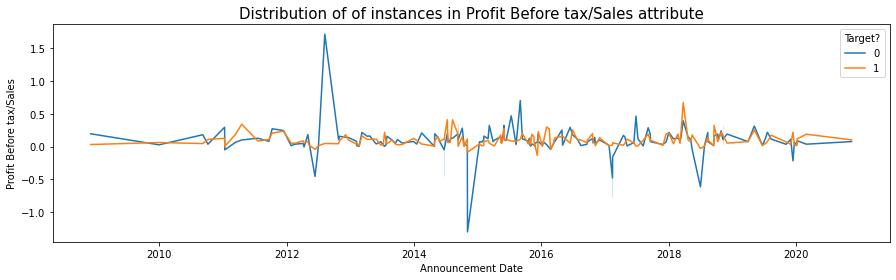

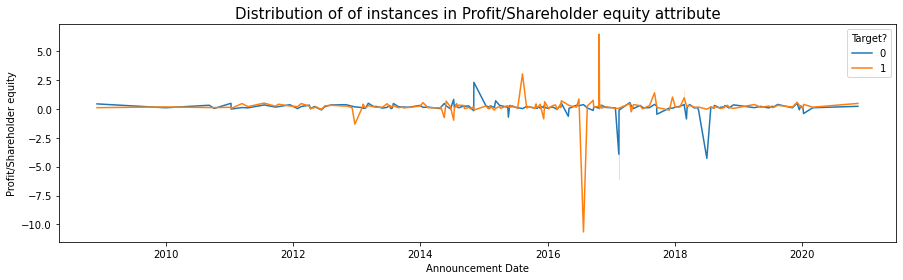

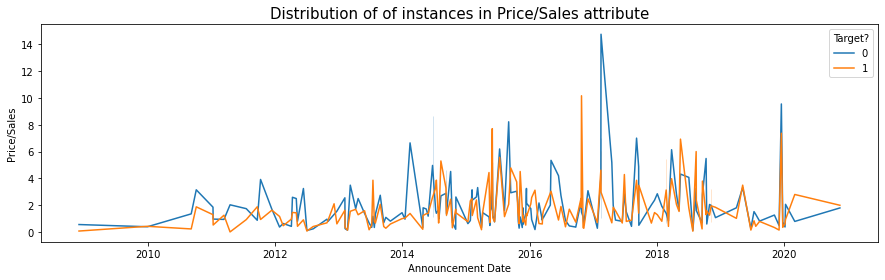

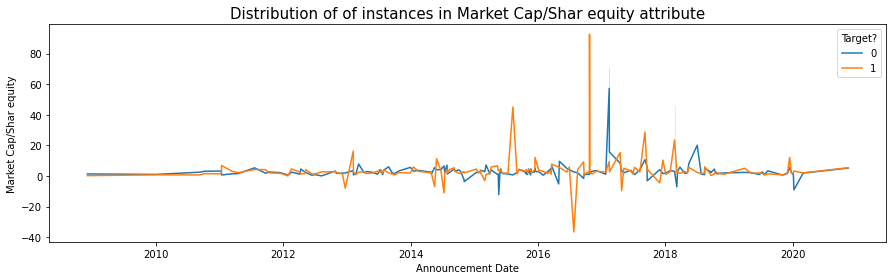

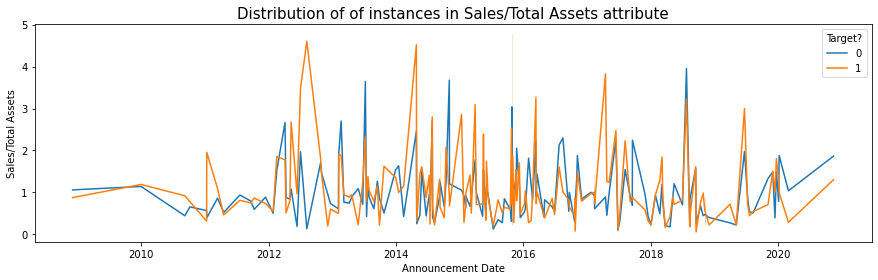

In [503]:
feat_names = target.drop(['Label', 'Announcement Date', 'Announcement Date-1',
                          'Announcement Date-30'], axis = 1).columns
for col in feat_names:
    plt.figure(figsize=(15,4))
    ax = sns.lineplot(x= 'Announcement Date', y= col, data=target, hue = 'Label')
    ax.legend(loc = 'upper right', title = 'Target?')
    ax.set_title('Distribution of of instances in ' + col + ' attribute', fontsize = 15)
plt.show()

In [504]:
X = target.drop(['Label', 'Announcement Date', 'Announcement Date-1', 'Announcement Date-30'], axis = 1)
y = target['Label'].values

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

### Evaluation of logistic regression and decision tree models before clustering

In [506]:
lr_t = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 10, random_state=0)
lr_t.fit(X_train, y_train)

print('Classification accuracy on training set: {:.3f}'.format(lr_t.score(X_train, y_train)))
print('Classification accuracy on test set: {:.3f}'.format(lr_t.score(X_test, y_test)))

Classification accuracy on training set: 0.623
Classification accuracy on test set: 0.522


In [507]:
labels = ['target', 'Non-target']

print(classification_report(y_test, lr_t.predict(X_test), target_names = labels))

              precision    recall  f1-score   support

      target       0.43      0.77      0.56        26
  Non-target       0.71      0.37      0.48        41

    accuracy                           0.52        67
   macro avg       0.57      0.57      0.52        67
weighted avg       0.61      0.52      0.51        67



In [508]:
coeff_parameter = pd.DataFrame(lr_t.coef_.T,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Return%,1.140877
Net debt/Total Capital,0.086369
Debt/EV,0.010583
Net debt per share,-0.009663
Current Ratio,-0.045418
Gross Profit Margin,0.017835
Profit Before tax/Sales,0.822788
Profit/Shareholder equity,0.028752
Price/Sales,-0.107913
Market Cap/Shar equity,0.017161


In [509]:
dt_t = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_t.fit(X_train.astype(float), y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [510]:
y_pred_dt_t_train = dt_t.predict(X_train)
y_pred_dt_t_test = dt_t.predict(X_test)

print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train,y_pred_dt_t_train)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_pred_dt_t_test)))

Classification accuracy on training set: 0.739
Classification accuracy on test set: 0.522


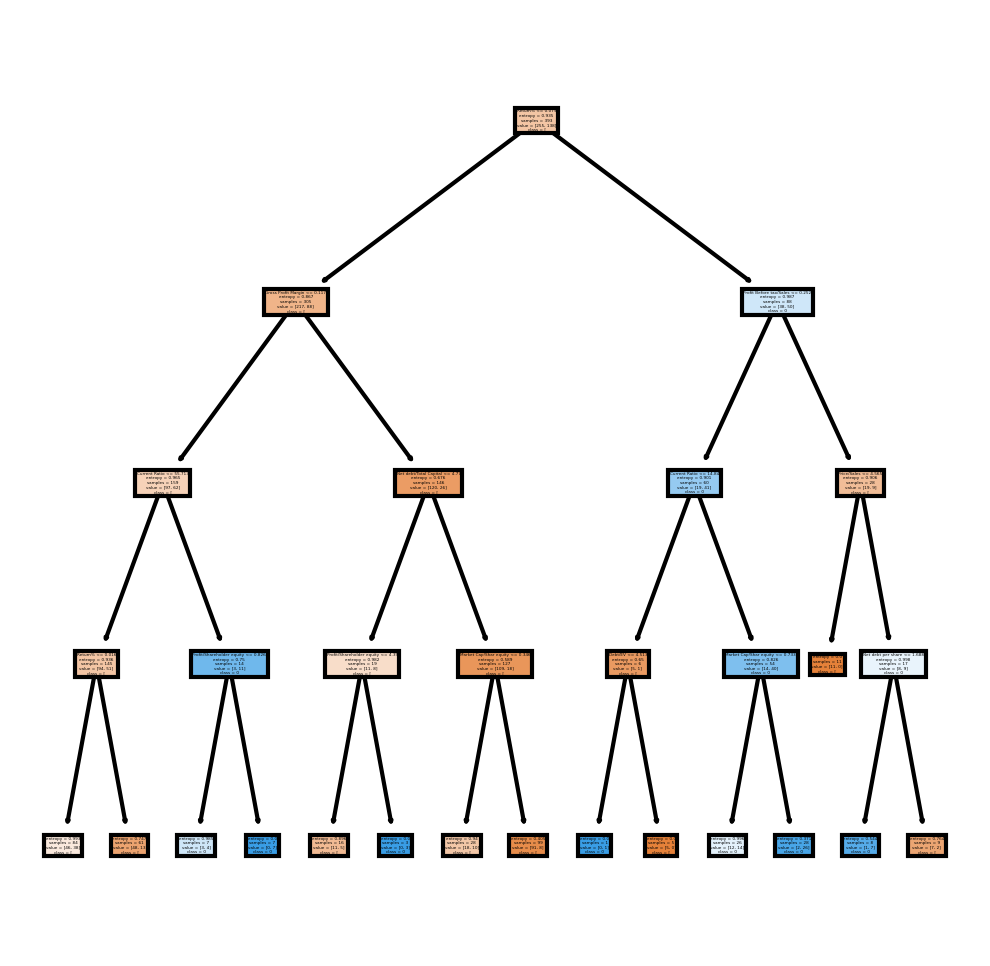

In [511]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X.columns, 
               class_names=str(np.unique(y_train)),
               filled = True);
fig.savefig('dt.png')

In [512]:
for i, column in enumerate(X.columns):
    if dt_t.feature_importances_[i] > 0:
        print('Importance of feature {}:, {:.3f}'.format(column, dt_t.feature_importances_[i]))

Importance of feature Return%:, 0.075
Importance of feature Net debt/Total Capital:, 0.101
Importance of feature Debt/EV:, 0.155
Importance of feature Net debt per share:, 0.184
Importance of feature Current Ratio:, 0.046
Importance of feature Gross Profit Margin:, 0.153
Importance of feature Price/Sales:, 0.033
Importance of feature Market Cap/Shar equity:, 0.080
Importance of feature Sales/Total Assets:, 0.173


### Application of Kmeans Clustering

In [513]:
km = KMeans(n_clusters=2, random_state=0).fit(X)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = km.labels_
cluster_map.head()

,data_index,cluster
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0


In [514]:
cl_0_idx = []
cl_1_idx = []

for i in range(len(X)):
    if cluster_map.iloc[i,1] == 0:
        cl_0_idx.append(i)
    if cluster_map.iloc[i,1] == 1:
        cl_1_idx.append(i)
        
print("Number of elements in Class 0 is" , len(cl_0_idx))
print("Number of elements in Class 1 is" , len(cl_1_idx))

Number of elements in Class 0 is 136
Number of elements in Class 1 is 199


### Evaluation of models on Class 0

In [515]:
X_0 = target.iloc[cl_0_idx].drop(['Label', 'Announcement Date', 'Announcement Date-1', 'Announcement Date-30'], axis = 1)
y_0 = target.iloc[cl_0_idx]['Label'].values

In [516]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, train_size = 0.6, test_size=0.4, random_state=0)

In [517]:
lr_0 = LogisticRegression(solver = 'liblinear',random_state=0, penalty = 'l2', C = 10)
lr_0.fit(X_train_0, y_train_0)

print('Classification accuracy on training set: {:.3f}'.format(lr_0.score(X_train_0, y_train_0)))
print('Classification accuracy on test set: {:.3f}'.format(lr_0.score(X_test_0, y_test_0)))

Classification accuracy on training set: 0.716
Classification accuracy on test set: 0.636


In [518]:
coeff_parameter = pd.DataFrame(lr_0.coef_.T,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Return%,0.986498
Net debt/Total Capital,1.346710
Debt/EV,0.024422
Net debt per share,-0.013775
Current Ratio,-0.023283
Gross Profit Margin,-0.000396
Profit Before tax/Sales,0.770200
Profit/Shareholder equity,-0.502315
Price/Sales,0.142011
Market Cap/Shar equity,0.094903


In [519]:
labels = ['target', 'Non-target']

print(classification_report(y_test_0, lr_0.predict(X_test_0), target_names = labels))

              precision    recall  f1-score   support

      target       0.58      0.48      0.52        23
  Non-target       0.67      0.75      0.71        32

    accuracy                           0.64        55
   macro avg       0.62      0.61      0.61        55
weighted avg       0.63      0.64      0.63        55



In [520]:
dt_0 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
dt_0.fit(X_train_0.astype(float), y_train_0)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [521]:
prediction_train_dt0 = dt_0.predict(X_train_0)
prediction_test_dt0 = dt_0.predict(X_test_0)
print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train_0,prediction_train_dt0)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test_0,prediction_test_dt0)))

Classification accuracy on training set: 0.778
Classification accuracy on test set: 0.691


In [522]:
labels = ['target', 'Non-target']

print(classification_report(y_test_0, prediction_test_dt0, target_names = labels))

              precision    recall  f1-score   support

      target       0.58      0.96      0.72        23
  Non-target       0.94      0.50      0.65        32

    accuracy                           0.69        55
   macro avg       0.76      0.73      0.69        55
weighted avg       0.79      0.69      0.68        55



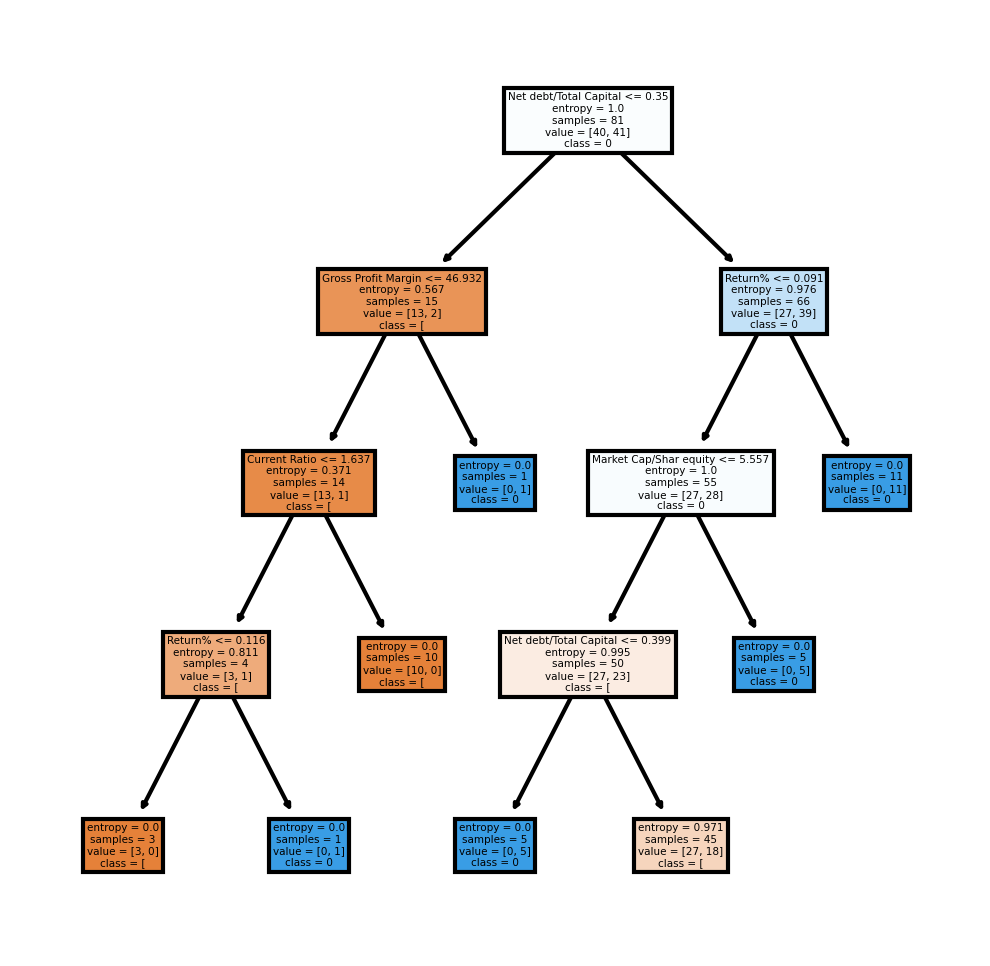

In [523]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_0,
               feature_names = X_0.columns, 
               class_names=str(np.unique(y_train_0)),
               filled = True);
fig.savefig('dt_0.png')

In [223]:
for i, column in enumerate(X_0.columns):
    if dt_0.feature_importances_[i] > 0:
        print('Importance of feature {}:, {:.3f}'.format(column, dt_0.feature_importances_[i]))

Importance of feature Return%:, 0.292
Importance of feature Net debt/Total Capital:, 0.326
Importance of feature Debt/EV:, 0.140
Importance of feature Current Ratio:, 0.045
Importance of feature Gross Profit Margin:, 0.076
Importance of feature Market Cap/Shar equity:, 0.120


In [287]:
rf_t = RandomForestClassifier(n_estimators=500, 
                            criterion='entropy', 
                            max_features=1, 
                            max_depth=5, 
                            n_jobs=2)
rf_t.fit(X_train_0, y_train_0)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=1,
                       n_estimators=500, n_jobs=2)

In [289]:
prediction_train_rf0 = rf_t.predict(X_train_0)
prediction_test_rf0 = rf_t.predict(X_test_0)

print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test_0,prediction_test_rf0)))
labels = ['target', 'Aquirer']
print(classification_report(y_test_0, prediction_test_rf0, target_names = labels))

Classification accuracy on test set: 0.527
              precision    recall  f1-score   support

      target       0.43      0.43      0.43        23
     Aquirer       0.59      0.59      0.59        32

    accuracy                           0.53        55
   macro avg       0.51      0.51      0.51        55
weighted avg       0.53      0.53      0.53        55



### Evaluation of models on Class 1

In [290]:
X_1 = target.iloc[cl_1_idx].drop(['Label', 'Announcement Date', 'Announcement Date-1', 'Announcement Date-30'], axis = 1)
y_1 = target.iloc[cl_1_idx]['Label'].values

In [293]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size = 0.6, test_size=0.4, random_state=0)

In [294]:
lr_1 = LogisticRegression(solver = 'liblinear',random_state=0,penalty = 'l2', C = 10)
lr_1.fit(X_train_1, y_train_1)

print('Classification accuracy on training set: {:.3f}'.format(lr_1.score(X_train_1, y_train_1)))
print('Classification accuracy on test set: {:.3f}'.format(lr_1.score(X_test_1, y_test_1)))

Classification accuracy on training set: 0.647
Classification accuracy on test set: 0.575


In [295]:
labels = ['target', 'Non-target']
print(classification_report(y_test_1, lr_1.predict(X_test_1), target_names = labels))

              precision    recall  f1-score   support

      target       0.63      0.55      0.59        44
  Non-target       0.52      0.61      0.56        36

    accuracy                           0.57        80
   macro avg       0.58      0.58      0.57        80
weighted avg       0.58      0.57      0.58        80



In [296]:
coeff_parameter = pd.DataFrame(lr_1.coef_.T,X_1.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Return%,1.982264
Net debt/Total Capital,-0.327788
Debt/EV,-0.007900
Net debt per share,0.030206
Current Ratio,0.088598
Gross Profit Margin,0.026496
Profit Before tax/Sales,-0.921150
Profit/Shareholder equity,0.242409
Price/Sales,0.047361
Market Cap/Shar equity,-0.126305


In [297]:
dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
dt_1.fit(X_train_1.astype(float), y_train_1)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [298]:
prediction_train_dt1 = dt_1.predict(X_train_1)
prediction_test_dt1 = dt_1.predict(X_test_1)

print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train_1,prediction_train_dt1)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test_1,prediction_test_dt1)))

Classification accuracy on training set: 0.782
Classification accuracy on test set: 0.463


In [299]:
labels = ['target', 'Non-target']
print(classification_report(y_test_1, prediction_test_dt1, target_names = labels))

              precision    recall  f1-score   support

      target       0.52      0.34      0.41        44
  Non-target       0.43      0.61      0.51        36

    accuracy                           0.46        80
   macro avg       0.47      0.48      0.46        80
weighted avg       0.48      0.46      0.45        80



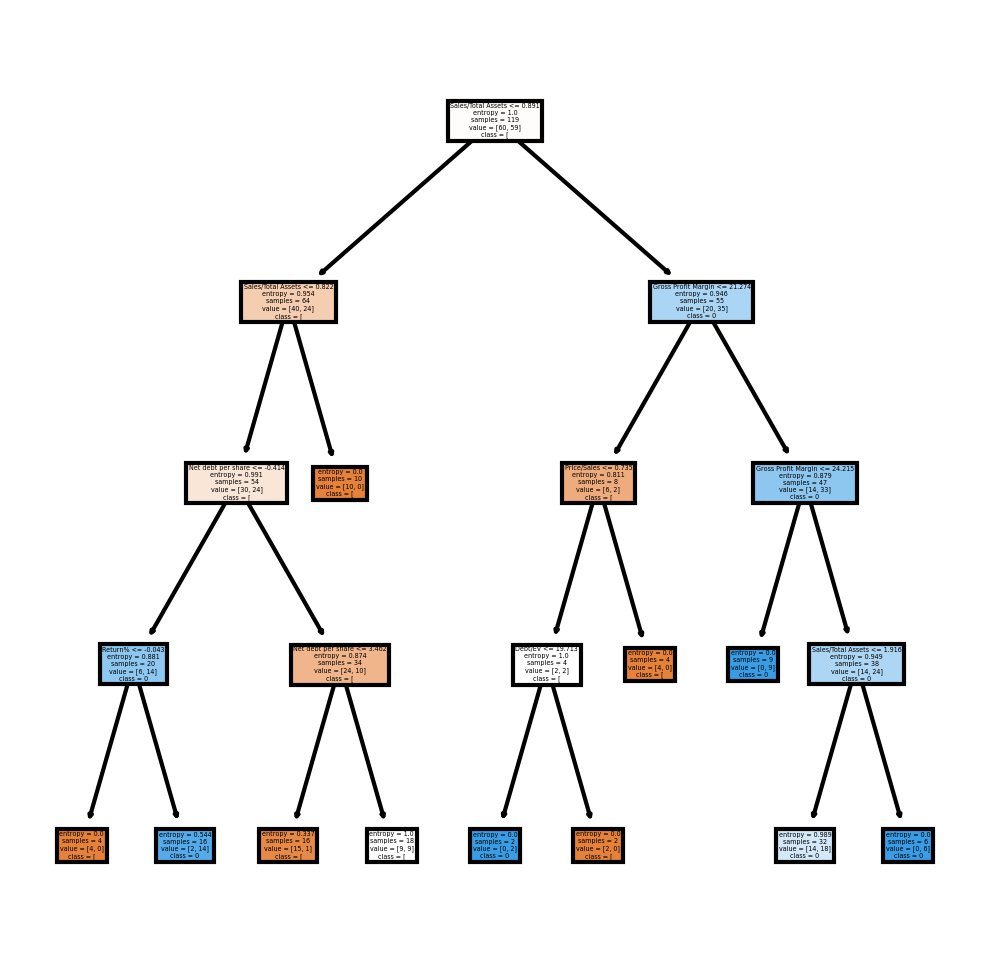

In [300]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_1,
               feature_names = X.columns, 
               class_names=str(np.unique(y_train_1)),
               filled = True);
fig.savefig('dt1.png')

In [301]:
for i, column in enumerate(X_1.columns):
    if dt_0.feature_importances_[i] > 0:
        print('Importance of feature {}:, {:.3f}'.format(column, dt_0.feature_importances_[i]))

Importance of feature Return%:, 0.340
Importance of feature Net debt/Total Capital:, 0.379
Importance of feature Current Ratio:, 0.052
Importance of feature Gross Profit Margin:, 0.088
Importance of feature Market Cap/Shar equity:, 0.140


# Section 4: Classification of New entries based on Rumors
- Constraction of dataset
- Classification between Target and Aquirer
- Clustering
- Classification and probability estimate

In [564]:
# read  dataset on rumored target and aquirer companies
new = pd.read_excel (r'C:\Users\aramy\OneDrive - University of Edinburgh\Hackathon\Rumored_TA.xlsx')
new

,RIC,Return%,Debt/EV,Net debt per share,Current Ratio,Gross Profit Margin,Profit Before tax/Sales,Profit/Shareholder equity,Price/Sales,Market Cap/Shar equity,Sales/Total Assets
0,PINS.K,0.080591,5.560000,-2.810320,11.50969,73.45252,-0.022166,-0.016732,30.121328,22.737142,0.648662
1,CVX,0.008881,21.140797,20.095717,1.17558,25.90742,-0.018946,-0.013517,1.576162,1.235733,0.394896
2,GPN,0.029523,14.447750,26.348404,1.21990,58.63095,0.168612,0.027572,7.855620,2.094775,0.103138
3,OMCL.O,0.173259,1.492550,-1.832574,2.03901,48.70667,0.082420,0.087468,5.110764,5.389166,0.722937
4,EVRG.K,0.039864,35.556515,44.031665,0.62832,58.68721,0.156319,0.094169,2.521881,1.461016,0.198176
5,CNX,-0.061874,53.056156,14.750248,0.94170,33.28886,0.071795,0.027814,2.003226,0.466494,0.212172
6,DUK,0.039644,41.298517,83.126876,0.62114,52.14721,0.163045,0.085275,2.496427,1.270990,0.157890
7,GRUB.K,0.037702,10.917127,0.740641,2.27105,27.97000,-0.015220,-0.013371,3.279017,2.880726,0.552490
8,AMC,0.576923,90.315426,44.182052,0.34818,55.62420,-0.014019,-0.063169,0.078120,0.351996,0.400050


### Potential Target company identification

In [565]:
classes = rf.predict(new.iloc[:,1:11])

RIC = new['RIC']
classmap = pd.DataFrame(list(zip(RIC, classes)),
                        columns =['RIC', 'Class'])
classmap

,RIC,Class
0,PINS.K,1
1,CVX,0
2,GPN,0
3,OMCL.O,1
4,EVRG.K,0
5,CNX,0
6,DUK,0
7,GRUB.K,0
8,AMC,1


### Final company classification

In [488]:
# read  dataset on rumored target and non-target(peer) companies
new = pd.read_excel (r'C:\Users\aramy\OneDrive - University of Edinburgh\Hackathon\Rumored_TN.xlsx')
new

,RIC,Return%,Net debt/Total Capital,Debt/EV,Net debt per share,Current Ratio,Gross Profit Margin,Profit Before tax/Sales,Profit/Shareholder equity,Price/Sales,Market Cap/Shar equity,Sales/Total Assets
0,PINS.K,0.080591,-0.78502,5.560000,-2.810320,11.50969,73.45252,-0.022166,-0.016732,30.121328,22.737142,0.648662
1,CVX,0.008881,0.21853,21.140797,20.095717,1.17558,25.90742,-0.018946,-0.013517,1.576162,1.235733,0.394896
2,GPN,0.029523,0.21014,14.447750,26.348404,1.21990,58.63095,0.168612,0.027572,7.855620,2.094775,0.103138
3,OMCL.O,0.173259,-0.08624,1.492550,-1.832574,2.03901,48.70667,0.082420,0.087468,5.110764,5.389166,0.722937
4,EVRG.K,0.039864,0.53803,35.556515,44.031665,0.62832,58.68721,0.156319,0.094169,2.521881,1.461016,0.198176
5,CNX,-0.061874,0.35607,53.056156,14.750248,0.94170,33.28886,0.071795,0.027814,2.003226,0.466494,0.212172
6,DUK,0.039644,0.55792,41.298517,83.126876,0.62114,52.14721,0.163045,0.085275,2.496427,1.270990,0.157890
7,GRUB.K,0.037702,0.03414,10.917127,0.740641,2.27105,27.97000,-0.015220,-0.013371,3.279017,2.880726,0.552490
8,AMC,0.576923,0.75621,90.315426,44.182052,0.34818,55.62420,-0.014019,-0.063169,0.078120,0.351996,0.400050


In [489]:
new = new.iloc[:,1:12]
cl_preds = km.predict(new)
cl_preds

array([1, 0, 1, 1, 0, 0, 0, 1, 0])

In [494]:
cl_0_idx = []
cl_1_idx = []

for i in range(len(cl_preds)):
    if cl_preds[i] == 0:
        cl_0_idx.append(i)
    if cl_preds[i] == 1:
        cl_1_idx.append(i)
cl_0_idx

[0, 2, 3, 7]

In [491]:
lr_cl_0 = lr_0.predict(new.iloc[cl_0_idx])
lr_cl_1 = lr_1.predict(new.iloc[cl_1_idx])
prob_0 = lr_0.predict_proba(new.iloc[cl_0_idx])
prob_1 = lr_1.predict_proba(new.iloc[cl_1_idx])

In [495]:
df = pd.DataFrame(list(zip(RIC)),
               columns =['RIC'])

cluster_0 = df.iloc[cl_0_idx]
cluster_0['Cluster'] = [0] * len(cl_0_idx)
cluster_1 = df.iloc[cl_1_idx]
cluster_1['Cluster'] = [1] * len(cl_1_idx)

cluster_0['Class'] = list(lr_cl_0)
cluster_1['Class'] = list(lr_cl_1)

cluster_0['Probability'] = prob_0[:,1]
cluster_1['Probability'] = prob_1[:,1]

predictions = pd.concat([cluster_0,cluster_1], ignore_index=True)
predictions

,RIC,Cluster,Class,Probability
0,CVX,0,0,0.297632
1,EVRG.K,0,0,0.470277
2,CNX,0,1,0.541856
3,DUK,0,0,0.378503
4,AMC,0,1,0.820911
5,PINS.K,1,1,0.614294
6,GPN,1,1,0.581651
7,OMCL.O,1,1,0.501123
8,GRUB.K,1,0,0.326975


In [566]:
classmap

,RIC,Class
0,PINS.K,1
1,CVX,0
2,GPN,0
3,OMCL.O,1
4,EVRG.K,0
5,CNX,0
6,DUK,0
7,GRUB.K,0
8,AMC,1


### Limitations

- Limited access to the News API
- Unavailability of data for many companies which substantially reduced the final size of Dataset

### Future work
- Using Cumulative Abnormal Return isntead of 1m total return
- Having news data as an additional variable controning Abnormal returns
- Integration of MD&A sections of 10K report as an additional Varialbes